The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. 

train.tsv contains the phrases and their associated sentiment labels.

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report



## Read the data and load it as a dataframe in the variable "dataset" ; Note: File is "tab" seperated ( 1 mark )

In [2]:
dataset = pd.read_csv("train.tsv",sep='\t')

## Print the dataframe ( 1 mark )

In [3]:
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


## Print the distribution of the Sentiment ( 1 mark )

In [4]:
dataset.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [5]:

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dataset['Phrase'])

## Divide the data into train and test in the ratio 80 and 20 respectively. ( 1 mark )

In [6]:
X_train,X_test,y_train,y_test = train_test_split(text_counts,dataset["Sentiment"],test_size=0.2,random_state=10)

## Train Multinomial Naive Bayes Classification model using Sklearn ( 2 marks )

In [7]:
multinomialnb = MultinomialNB()
multinomialnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Calculate the Test Accuracy , Precision , Recall , Confusion Matrix on test data ( 4 marks, each cary 1 mark )

ACCURACY, PRECISION, RECALL, F1 SCORE
-------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.27      0.34      1463
           1       0.49      0.43      0.46      5367
           2       0.69      0.78      0.73     15841
           3       0.53      0.51      0.52      6678
           4       0.48      0.30      0.37      1863

    accuracy                           0.61     31212
   macro avg       0.53      0.46      0.48     31212
weighted avg       0.60      0.61      0.60     31212

CONFUSION MATRIX IN HEATMAP FORMAT
----------------------------------


Text(0.5, 15.0, 'Predicted label')

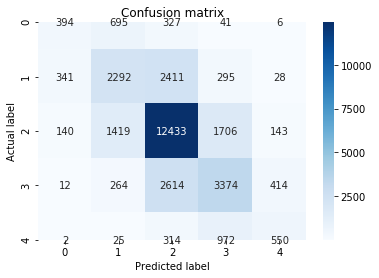

In [8]:
y_pred = multinomialnb.predict(X_test)

print('ACCURACY, PRECISION, RECALL, F1 SCORE')
print('-------------------------------------')
print(classification_report(y_test,y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('CONFUSION MATRIX IN HEATMAP FORMAT')
print('----------------------------------')
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Predict the class for the sentence : "I ate pizza last night at dominos which was very healthy and tasty" ( 2 marks )

In [9]:
label_descs = { 0 : "negative",  1 : "somewhat negative",  2: "neutral",  3: "somewhat positive" ,  4 :"positive"} 

test_sentence = "I ate pizza last night at dominos which was very healthy and tasty"
test_vector = cv.transform([test_sentence])
y_pred = multinomialnb.predict(test_vector)
print("The prediction of the sentence is: %d - %s"%(y_pred[0], label_descs[  y_pred[0]]))

The prediction of the sentence is: 3 - somewhat positive


In [10]:
print('COMPLETED')

COMPLETED
